In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math

from imblearn.over_sampling import SMOTENC

In [69]:
df = pd.read_csv('../data/clean_train.csv')

In [70]:
df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'current_pincode_id', 'state_id', 'employee_code_id',
       'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag',
       'driving_flag', 'passport_flag', 'perform_cns_score', 'pri_no_of_accts',
       'pri_active_accts', 'pri_overdue_accts', 'pri_current_balance',
       'pri_sanctioned_amount', 'pri_disbursed_amount', 'sec_no_of_accts',
       'sec_active_accts', 'sec_overdue_accts', 'sec_current_balance',
       'sec_sanctioned_amount', 'sec_disbursed_amount', 'primary_instal_amt',
       'sec_instal_amt', 'new_accts_in_last_six_months',
       'delinquent_accts_in_last_six_months', 'no_of_inquiries',
       'loan_default', 'employment_self', 'employment_none',
       'age_at_disbursal', 'average_acct_age_months',
       'credit_history_length_months', 'cns_score_category',
       'cns_score_unreliable'],
      dtype='object')

In [111]:
continuous = ['disbursed_amount', 'asset_cost', 'ltv', 'perform_cns_score', 'pri_no_of_accts', 'pri_active_accts',
              'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount', 'sec_no_of_accts',
              'sec_active_accts', 'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount', 'sec_disbursed_amount',
              'primary_instal_amt', 'sec_instal_amt', 'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
              'no_of_inquiries']

binaries = ['mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag', 'passport_flag', 'employment_self',
            'employment_none', 'cns_score_unreliable']

categorical = ['branch_id', 'supplier_id', 'manufacturer_id', 'current_pincode_id', 'state_id', 'employee_code_id']

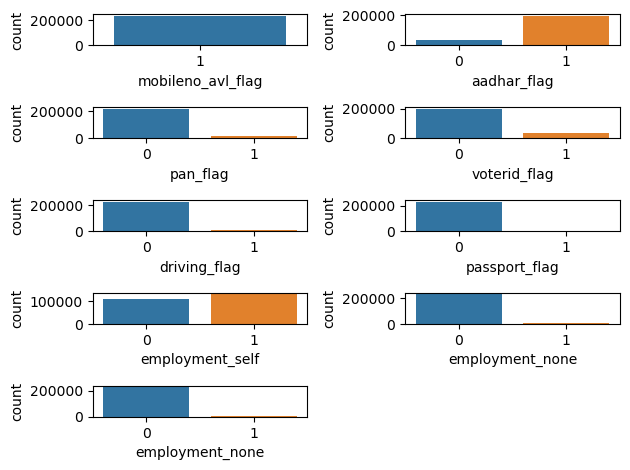

In [97]:
fig, ax =plt.subplots(5,2)
fig.delaxes(ax[4,1])

plt.subplots_adjust(wspace = 1, hspace = 1)

sns.countplot(x = df['mobileno_avl_flag'], ax=ax[0][0])
sns.countplot(x = df['aadhar_flag'], ax=ax[0][1])
sns.countplot(x = df['pan_flag'], ax=ax[1][0])
sns.countplot(x = df['voterid_flag'], ax=ax[1][1])
sns.countplot(x = df['driving_flag'], ax=ax[2][0])
sns.countplot(x = df['passport_flag'], ax=ax[2][1])
sns.countplot(x = df['employment_self'], ax=ax[3][0])
sns.countplot(x = df['employment_none'], ax=ax[3][1])
sns.countplot(x = df['employment_none'], ax=ax[4][0])


plt.tight_layout()

In [115]:
for j, i in list(enumerate(continuous)):
    print(int(j/3), int(j/7))

0 0
0 0
0 0
1 0
1 0
1 0
2 0
2 1
2 1
3 1
3 1
3 1
4 1
4 1
4 2
5 2
5 2
5 2
6 2
6 2
6 2


In [116]:
fig, ax = plt.subplots(7, 3)

for j, i in list(enumerate(continuous)):
    ax1 = int(j/3)
    ax2 = int(j/7)
    sns.histplot(df[i], ax = ax[ax1][ax2])

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fe50abf60d0> (for post_execute):


KeyboardInterrupt: 

NameError: name 'ax' is not defined

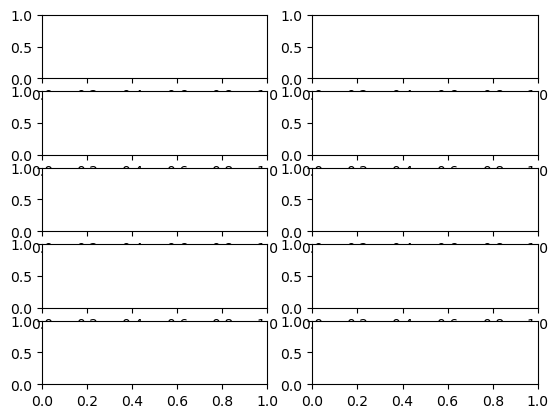

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aadhar_flag', ylabel='count'>

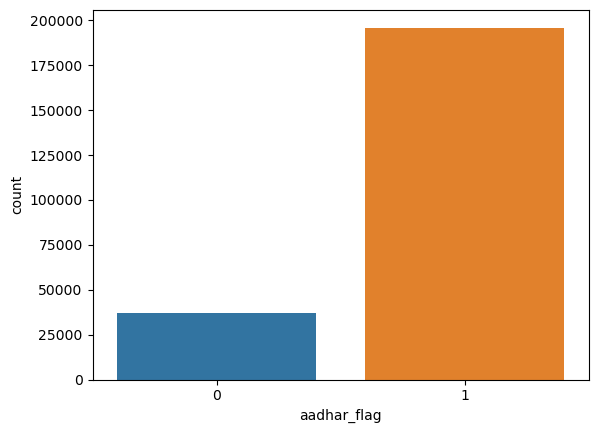

In [49]:
sns.countplot(df['aadhar_flag'])

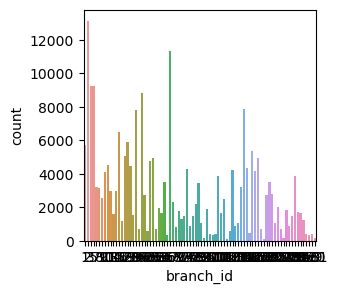

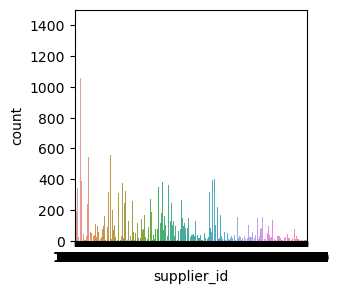

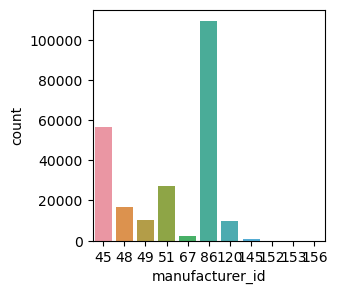

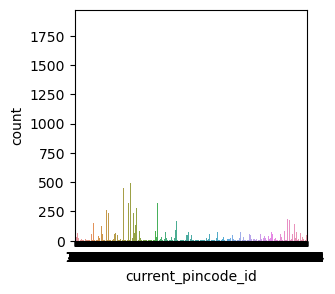

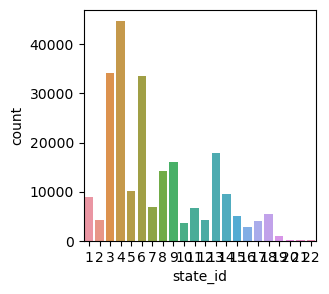

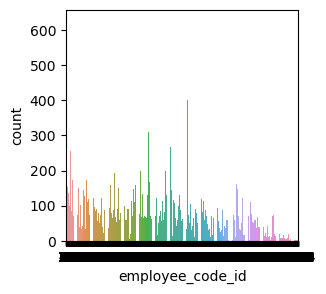

In [35]:
for i in categorical:
    plt.figure(figsize = (3,3), )
    sns.countplot(data = df, x = i);

KeyboardInterrupt: 

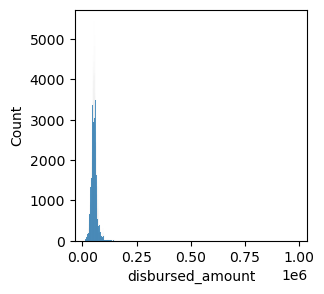

Error in callback <function flush_figures at 0x7fe50abf60d0> (for post_execute):


KeyboardInterrupt: 

In [36]:
for i in continuous:
    plt.figure(figsize = (3, 3))
    sns.histplot(df[i])

In [10]:
df['mobileno_avl_flag'].value_counts()

(1    233154
 Name: mobileno_avl_flag, dtype: int64,
 (233154, 41))

False    182543
True      50611
Name: loan_default, dtype: int64

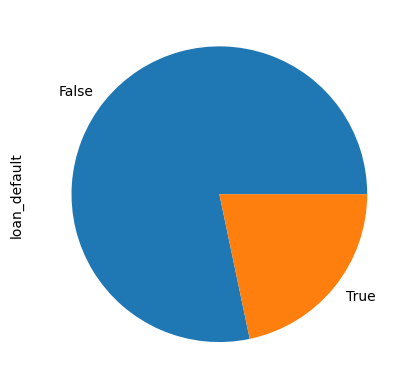

In [4]:
df['loan_default'].astype(bool).value_counts().plot.pie()
df['loan_default'].astype(bool).value_counts()

# Our classes are imbalanced
# We will apply SMOTENC to balance our classes

In [5]:
X = df.drop(columns = 'loan_default')
y = df['loan_default']

cat_features = []

for i, j in list(enumerate(X.columns)):
    if j in ['branch_id', 'supplier_id', 'manufacturer_id', 'current_pincode_id', 'state_id','employee_code_id',
             'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag','driving_flag', 'passport_flag',
             'employment_self', 'employment_none','cns_score_category','cns_score_unreliable']:
        cat_features.append(i)

cat_features

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 33, 34, 38, 39]

In [6]:
smote_nc = SMOTENC(categorical_features = cat_features)

X_resampled, y_resampled = smote_nc.fit_resample(X, y)

KeyboardInterrupt: 

In [15]:
df_resampled = pd.concat([X_resampled, y_resampled], axis = 1)

df_resampled.to_csv('../data/train_resampled')

False    182543
True     182543
Name: loan_default, dtype: int64

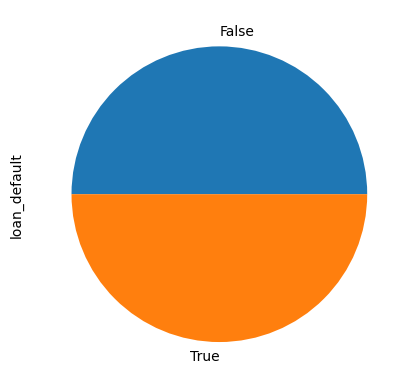

In [17]:
df_resampled['loan_default'].astype(bool).value_counts().plot.pie()
df_resampled['loan_default'].astype(bool).value_counts()

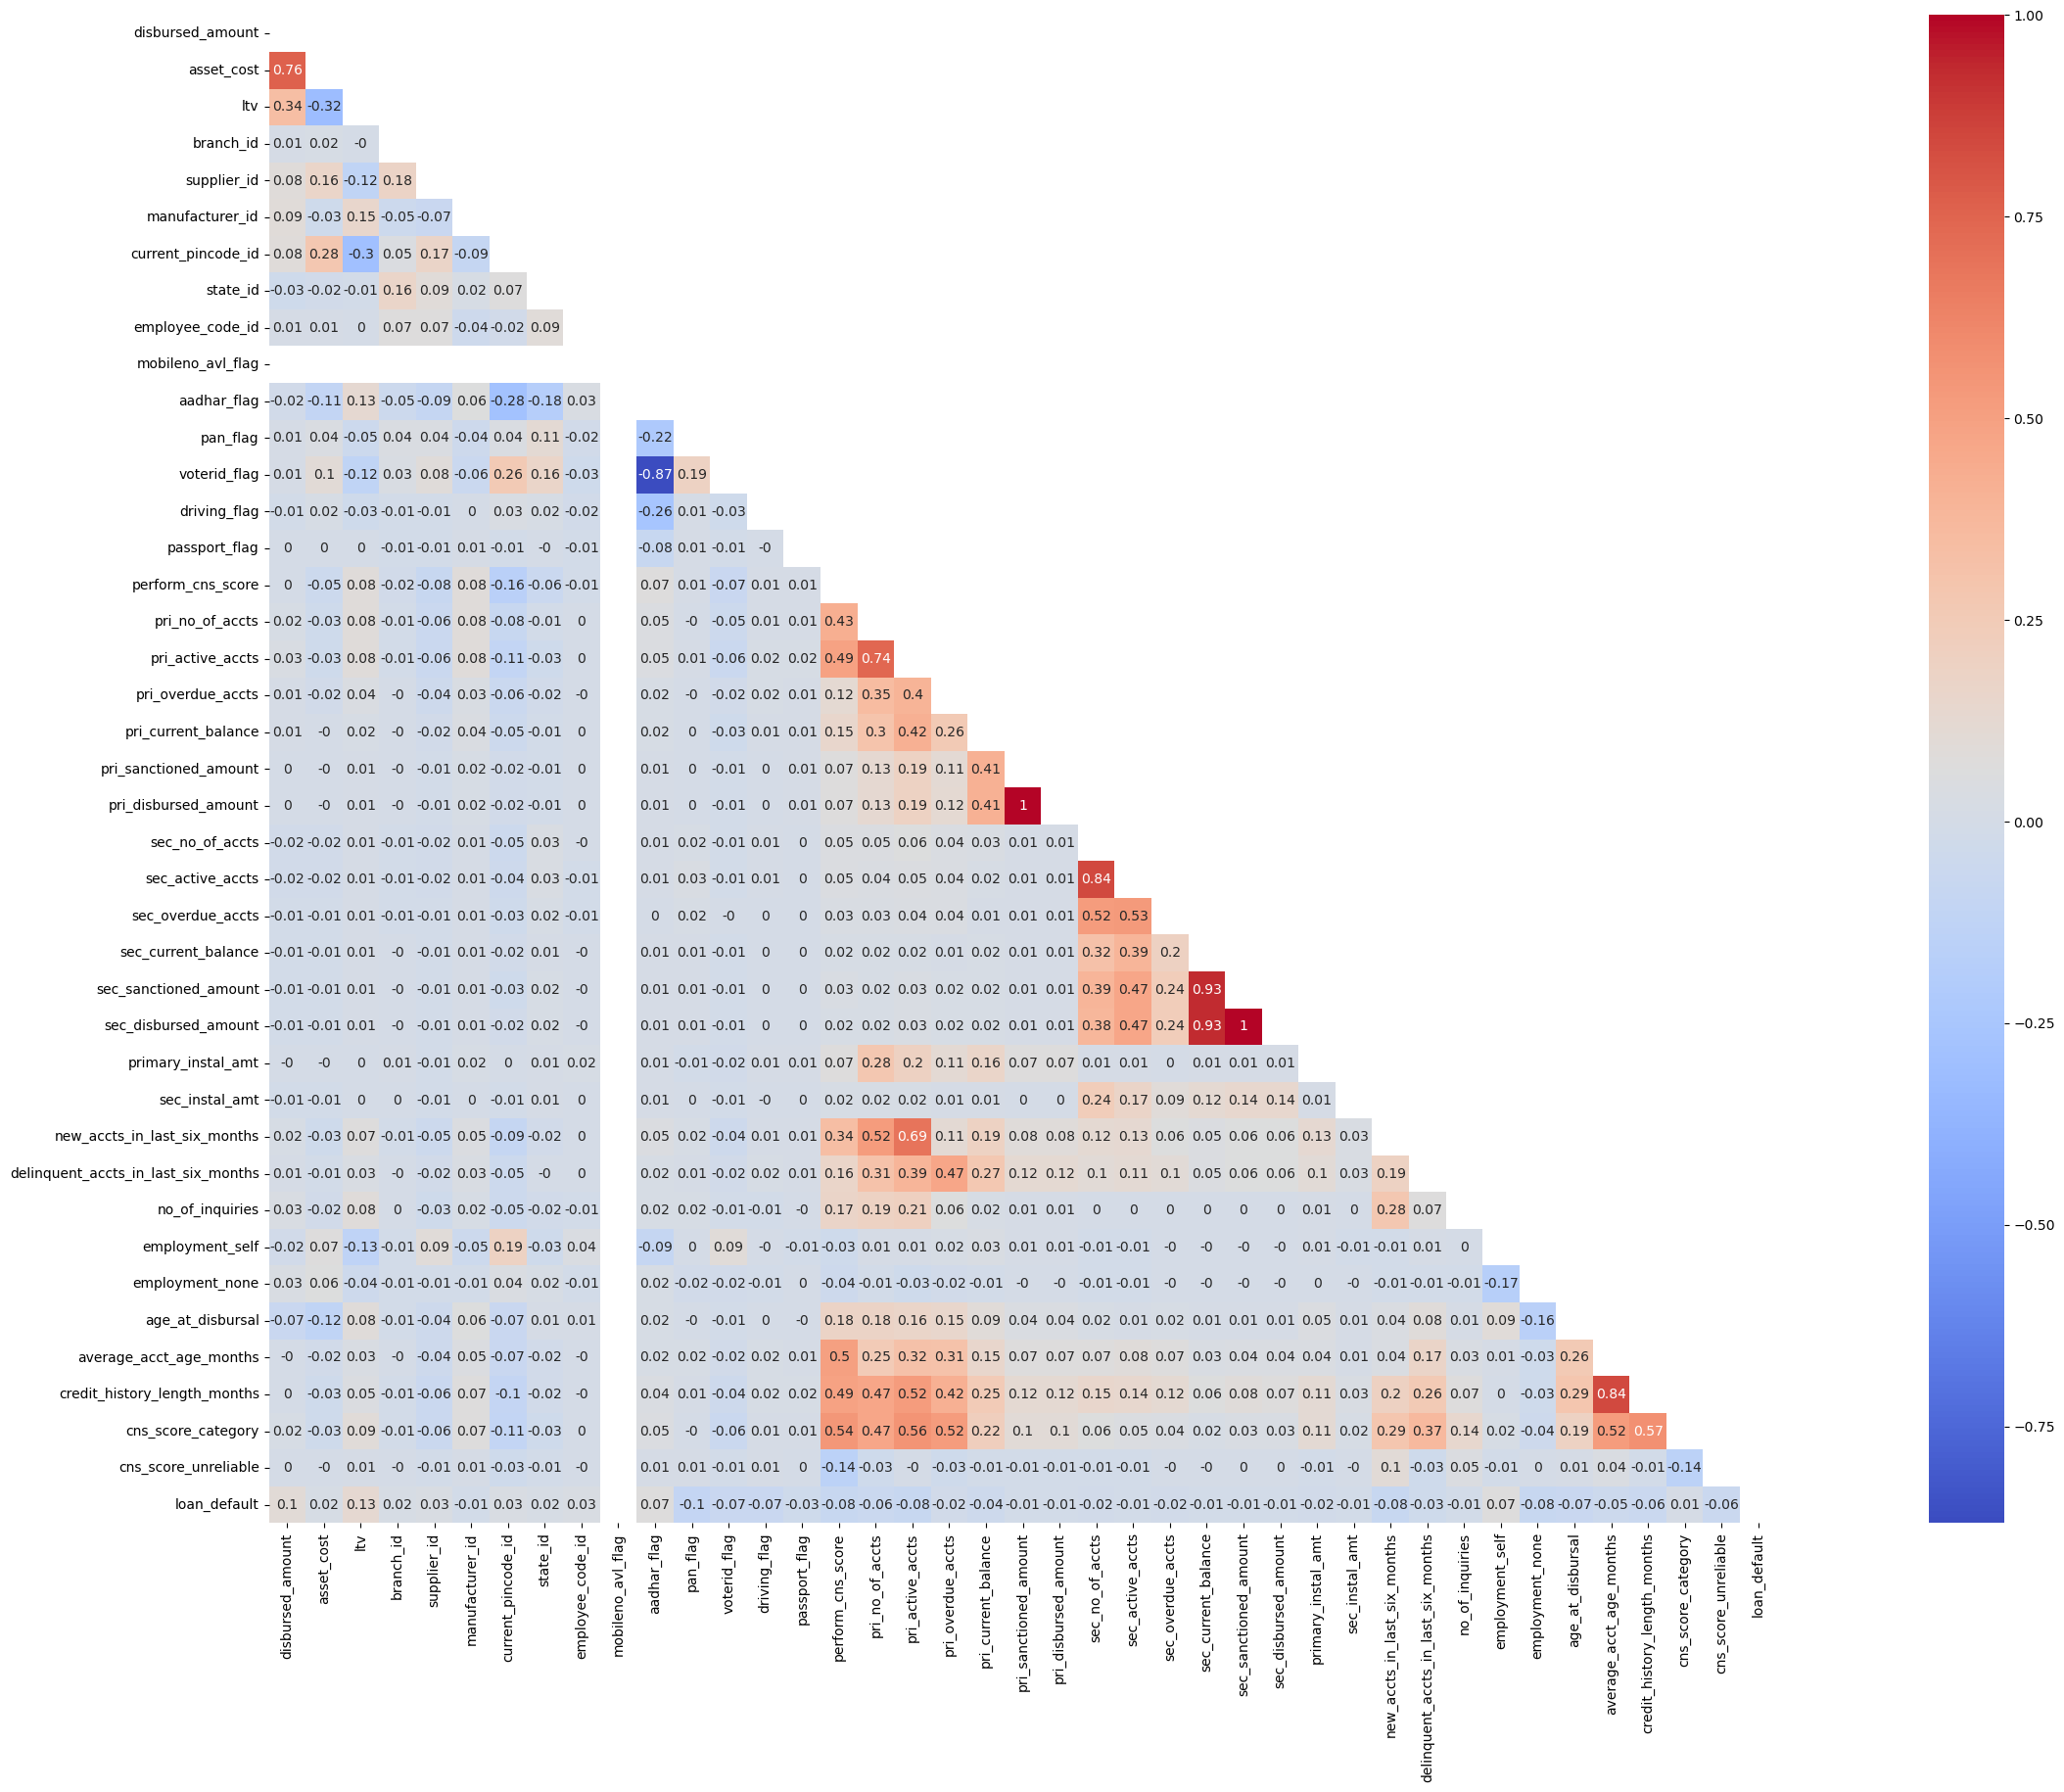

In [19]:
plt.figure(figsize=(40,20))

corr = round(df_resampled.corr(), 2)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
            mask = mask,
            square = True,
            cmap = 'coolwarm',
            annot = True);

In [ ]:
sns.histplot(df['disbursed_amount'], bins = 1_000)

In [ ]:
df['disbursed_amount'].mean()

In [ ]:
cols = ['disbursed_amount', 'asset_cost', 'ltv']

for i in cols:
    plt.figure(figsize = (10, 5))
    sns.histplot(df[i])

In [ ]:
fig, axs = plt.subplots(len(cols), figsize=(10, 5*len(cols)))




for j, col in enumerate(cols):
    for i, (val, group) in enumerate(df.groupby('loan_default')):
        column = binning_by_depth_factor(group[col], 10) 
        column.value_counts().to_frame('counts').reset_index().sort_values('index').plot(x='index', y='counts', label=val, ax=axs[j])
        axs[j].set_xlabel(col)
        axs[j].set_ylabel('counts')